In [2]:
import csv
import numpy as np

%matplotlib inline

days = 200
trials = 10000
datas = [[] for i in range(4)]

csv_files = ["day2-10000.csv", "day7-10000.csv", "day14-10000.csv", "day14-10000-3groups.csv"]

peak_values_per_trial = [[] for i in range(4)]


In [3]:
for counter in range(4):
    with open(csv_files[counter], newline="\n") as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='\"')
        temp_datas = [ 0 for i in range(trials) ]
        temp_peak_values_per_trial = []
        trial_list = []
        for row in reader:
            trial = int(row[0])
            day = int(row[1])
            value = int(row[2])

            trial_list.append(value)

            if day == 200:
                temp_datas[trial] = trial_list
                temp_peak_values_per_trial.append(value)
                trial_list = []

        datas[counter] = (temp_datas)
        peak_values_per_trial[counter] = (temp_peak_values_per_trial)

In [4]:
peak_values_per_trial = np.array(peak_values_per_trial)

quantilized_middle_index = [[] for i in range(4)]
quantilized_low_index = [[] for i in range(4)]
quantilized_high_index = [[] for i in range(4)]

counter = 0
for peak_values in peak_values_per_trial:
    infimum = np.percentile(peak_values_per_trial[counter], 25)
    supereme = np.percentile(peak_values_per_trial[counter], 75)

    i = 0
    for t in peak_values:
        if t >= infimum and t <= supereme:
            quantilized_middle_index[counter].append(i)
        elif t < infimum:
            quantilized_low_index[counter].append(i)
        elif t > supereme:
            quantilized_high_index[counter].append(i)
        i += 1
    counter += 1

In [8]:
datas = np.array(datas)

quantilized_middle_datas = [np.zeros(datas[0][quantilized_middle_index[0]].shape) for i in range(4)]
quantilized_low_datas = [np.zeros(datas[0][quantilized_low_index[0]].shape) for i in range(4)]
quantilized_high_datas = [np.zeros(datas[0][quantilized_high_index[0]].shape) for i in range(4)]

for counter in range(4):
    quantilized_middle_datas[counter] = datas[counter][quantilized_middle_index[counter]]
    quantilized_low_datas[counter] = datas[counter][quantilized_low_index[counter]]
    quantilized_high_datas[counter] = datas[counter][quantilized_high_index[counter]]  

In [9]:
averaged_middle_datas = np.zeros((4, days))
averaged_low_datas = np.zeros((4, days))
averaged_high_datas = np.zeros((4, days))

for counter in range(4):
    for day in range(days):
        averaged_middle_datas[counter][day] = np.mean(quantilized_middle_datas[counter][:, day])
        averaged_low_datas[counter][day] = np.mean(quantilized_low_datas[counter][:, day])
        averaged_high_datas[counter][day] = np.mean(quantilized_high_datas[counter][:, day])

<function matplotlib.pyplot.show(*args, **kw)>

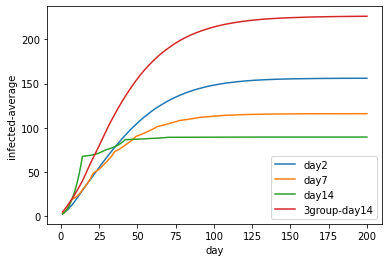

In [10]:
from matplotlib import pyplot as plt

plt.plot(range(1, days+1), averaged_middle_datas[0])
plt.plot(range(1, days+1), averaged_middle_datas[1])
plt.plot(range(1, days+1), averaged_middle_datas[2])
plt.plot(range(1, days+1), averaged_middle_datas[3])

plt.xlabel("day")
plt.ylabel("infected-average")
plt.legend(["day2", "day7", "day14", "3group-day14"])
plt.show

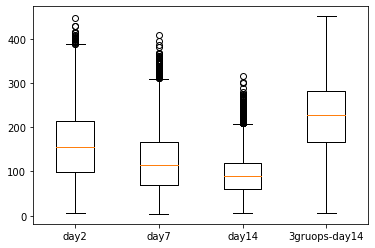

In [12]:
box_dict = {
    "day2" : peak_values_per_trial[0],
    "day7" : peak_values_per_trial[1],
    "day14" : peak_values_per_trial[2],
    "3gruops-day14" : peak_values_per_trial[3]
}

fig, ax = plt.subplots()
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())

plt.show()